<a href="https://colab.research.google.com/github/AliARajabi/deep-learning/blob/first-Image-Classification-with-simple-Deep-Neural-Network/first%20Image%20Classification%20with%20simple%20Deep%20Neural%20Network/first_Image_Classification_with_simple_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/AliARajabi/deep-learning.git

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [43]:
def load_data():
  train_data=h5py.File('/content/deep-learning/first  Image Classification with simple Deep Neural Network/train_catvnoncat.h5')
  x_train=np.array(train_data['train_set_x'])
  y_train=np.array(train_data['train_set_y'])

  test_data=h5py.File('/content/deep-learning/first  Image Classification with simple Deep Neural Network/test_catvnoncat.h5', 'r')
  x_test=np.array(test_data['test_set_x'])
  y_test=np.array(test_data['test_set_y'])
  print(train_data['list_classes'][:])
  return x_train,y_train,x_test,y_test,np.array(train_data['list_classes'])


first lests read data

In [48]:
x_train, y_train, x_test, y_test, classes = load_data()

[b'non-cat' b'cat']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


now the picture must be flattened

In [72]:
X_train=x_train.reshape(-1,x_train.shape[0])
X_test=x_test.reshape(-1,x_test.shape[0])

the next step is Standardizing the x

In [74]:
SX_train=X_train/255
SX_test=X_test/255

lets first start with one hidden layer architecture ( relu and one sigmoid for output layer)

so the input layer has size 12288 

the hidden layer has size 7

and output layer has size 1

at first the parameters must be initialize

In [90]:
np.random.seed(1)
L=7
parameters={}
parameters['W1']=np.random.randn(L,SX_train.shape[0])*0.01
parameters['b1']=np.zeros((L,1))

parameters['W2']=np.random.randn(1,L)*0.01
parameters['b2']=np.zeros((1,1))

now the gradient descent implementation

at first the hyper parameter tuning

In [105]:
epoch=2
learning_rate = 0.0075
W1=parameters['W1']
b1=parameters['b1']
W2=parameters['W2']
b2=parameters['b2']
m = y_train.shape[0]
costs = [] 

for i in range(epoch):
  # forward propagation
  Z1=W1.dot(SX_train) + b1
  print(Z1)
  A1=np.maximum(0,Z1)
  Z2=W2.dot(A1) + b2
  A2=1/(1+np.exp(-Z2))

  # compute cost
  cost = (1./m) * (-np.dot(y_train,np.log(A2).T) - np.dot(1-y_train, np.log(1-A2).T))
  cost = np.squeeze(cost) 

  # back propagation
  dA2 = - (np.divide(y_train, A2) - np.divide(1 - y_train, 1 - A2))
  dZ2 = dA2 * A2 * (1-A2)
  dW2 = 1./m * np.dot(dZ2,A1.T)
  db2 = 1./m * np.sum(dZ2, axis = 1, keepdims = True)
  dA1 = np.dot(W2.T,dZ2)
  dZ1 = np.array(dA1, copy=True)
  dZ1[Z1 <= 0] = 0
  dW1 = 1./m * np.dot(dZ1,SX_train.T)
  db1 = 1./m * np.sum(dZ1, axis = 1, keepdims = True)

  # update parameters
  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2

  if i % 100 == 0:
    #print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    costs.append(cost)
parameters['W1']=W1
parameters['b1']=b1
parameters['W2']=W2
parameters['b2']=b2


[[ 5.90368108  5.99415265  2.04317782 ...  4.83732869  9.81012267
   7.67934457]
 [-0.30172325 -0.42315302 -0.33334261 ... -0.5677434  -0.67494229
  -0.55179588]
 [ 0.53177333  1.6046663   0.60699693 ...  2.67892091  3.50864516
   3.03385018]
 ...
 [ 9.9752029   9.48249641  8.64092108 ...  7.46369559  8.00504979
   8.50611879]
 [-0.30380668 -0.18280006 -0.49249175 ... -0.50014932 -0.39873197
  -0.44786511]
 [ 0.21072943  2.37674747  0.64790029 ...  2.19264771  2.60102782
   3.59187488]]
[[ 5.96571564  6.05653014  2.10582038 ...  4.89947101  9.8718411
   7.74140344]
 [-0.30218899 -0.42363659 -0.3338147  ... -0.56821762 -0.67541168
  -0.55228181]
 [ 0.57679076  1.64991193  0.65243312 ...  2.72400982  3.55346506
   3.07885933]
 ...
 [ 9.94514955  9.45223206  8.61052344 ...  7.43353131  7.97512282
   8.47600726]
 [-0.30380668 -0.18280006 -0.49249175 ... -0.50014932 -0.39873197
  -0.44786511]
 [ 0.26884235  2.43462604  0.7060421  ...  2.24977073  2.65804048
   3.6486852 ]]


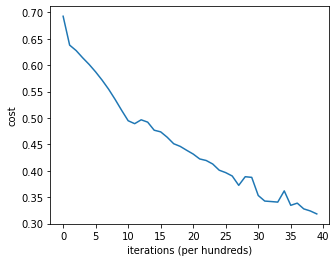

In [103]:
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.show()